<a href="https://colab.research.google.com/github/praveenkumarchandaliya/STTP_Program/blob/main/Pytorch_Fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Fundamentals: Your First Steps into Hands-on Deep Learning

This notebook provides an introduction to PyTorch, covering tensor initialization, operations, indexing, and reshaping.
Follow along to learn the basics with clear examples and detailed explanations.
# Table of Contents

- [What are Tensors?](#What-are-Tensors?)
- [Tensor Initialization](#Tensor-Initialization)
- [Common Tensor Initialization Methods](#Common-Tensor-Initialization-Methods)
- [Tensor Type Conversion](#Tensor-Type-Conversion)
- [Converting Between NumPy Arrays and Tensors](#Converting-Between-NumPy-Arrays-and-Tensors)
- [Tensor Mathematics and Comparison Operations](#Tensor-Mathematics-and-Comparison-Operations)
- [Matrix Multiplication and Batch Operations](#Matrix-Multiplication-and-Batch-Operations)
- [Broadcasting and Other Useful Operations](#Broadcasting-and-Other-Useful-Operations)
- [Tensor Indexing](#Tensor-Indexing)
- [Tensor Reshaping](#Tensor-Reshaping)

In [2]:
import torch
import numpy as np
import sys # Import the sys module
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Print versions
print("torch version:", torch.__version__)
print("numpy version:", np.__version__)
print("python version: ",sys.version)

torch version: 2.8.0+cpu
numpy version: 2.2.6
python version:  3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]


## What are Tensors?

Tensor holds a multi-dimensional array of elements of a single data type which is very similar with numpy’s ndarray. When the dimension is zero, it can be called a scalar. When the dimension is 1, it can be called a vector. When the dimension is 2, it can be called a matrix.

- 0-dimensional tensor: A single number (scalar).
- 1-dimensional tensor: A list of numbers (vector).
- 2-dimensional tensor: A table of numbers (matrix).

When the dimension is greater than 2, it is usually called a tensor.

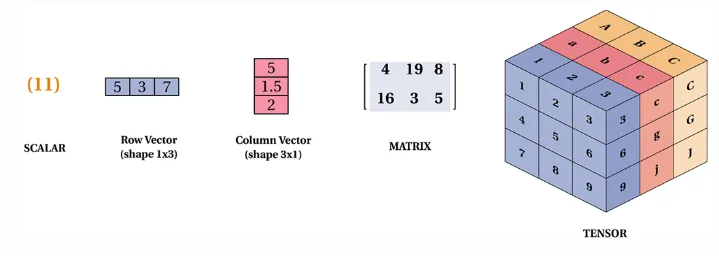

## Tensor Initialization

This code creates a 2×3 PyTorch tensor with float32 data type, assigns it to a specified device (CPU or GPU), and enables gradient tracking for backpropagation.

In [ ]:
# Check for CUDA availability and set the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize a 2x3 tensor with requires_grad enabled Enables automatic differentiation for this tensor.
my_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32, device=device, requires_grad=True)

[[1, 2, 3], 
 [4, 5, 6]],

print(my_tensor)
print("Data type:", my_tensor.dtype)
print("Device:", my_tensor.device)
print("Shape:", my_tensor.shape)
print("Requires Gradient:", my_tensor.requires_grad)

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)
Data type: torch.float32
Device: cpu
Shape: torch.Size([2, 3])
Requires Gradient: True


In [2]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create tensor
my_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]],
                        dtype=torch.float32,
                        device=device,
                        requires_grad=True)

# Forward pass
output = my_tensor.mean()  # Example operation
print(output)
# Backward pass
output.backward()

# Access gradients
print(my_tensor.grad)  # Gradient of output w.r.t. my_tensor

tensor(3.5000, grad_fn=<MeanBackward0>)
tensor([[0.1667, 0.1667, 0.1667],
        [0.1667, 0.1667, 0.1667]])


**Mathematical Definition of the Mean Operation** \\
$
f(\mathbf{X}) = \frac{1}{6} \sum_{i=1}^{2} \sum_{j=1}^{3} x_{ij} = 3.5
 $

**For each element $x_{ij}$ of the matrix $\mathbf{X}$:**
$
[
\frac{\partial f}{\partial x_{ij}} = \frac{1}{6} \quad \forall i,j
]
$


The full gradient matrix is:
$
\frac{\partial f}{\partial \mathbf{X}} =
\begin{bmatrix}
0.1667 & 0.1667 & 0.1667 \\
0.1667 & 0.1667 & 0.1667
\end{bmatrix}
$

## Other Common Tensor Initialization Methods

- **Empty Tensor:** Creates an uninitialized 3×3 tensor (random values).
- **Zeros Tensor:** Creates a 3×3 tensor filled with zeros.
- **Random Tensor:** Generates a 3×3 tensor with random values between 0 and 1.
- **Ones Tensor:** Creates a 3×3 tensor filled with ones.
- **Identity Matrix:** Generates a 4×4 identity matrix (diagonal of ones).
- **Arange Tensor:** Creates a 1D tensor with values from 0 to 4 (step of 1).
- **Linspace Tensor:** Generates 5 evenly spaced values between 0.1 and 1.
- **Normal Distributed Tensor:** Fills a tensor with values from a normal (Gaussian) distribution with mean 0 and std 1.
- **Uniform Distributed Tensor:** Fills a tensor with values from a uniform distribution between 0 and 1.
- **Diagonal Tensor:** Creates a 4×4 diagonal tensor with ones along the diagonal and zeros elsewhere.

In [ ]:
# Create an empty tensor of size 3x3
x = torch.empty(3, 3)
print("Empty Tensor:\n", x)

# Create a tensor filled with zeros
x = torch.zeros(3, 3)
print("Zeros Tensor:\n", x)

# Create a tensor with random values
x = torch.rand(3, 3)
print("Random Tensor:\n", x)

# Create a tensor filled with ones
x = torch.ones(3, 3)
print("Ones Tensor:\n", x)

# Create an identity matrix
x = torch.eye(4, 4)
print("Identity Matrix:\n", x)

# Create a tensor using arange
x = torch.arange(5)
print("Arange Tensor:\n", x)

# Create a tensor using linspace
x = torch.linspace(0.1, 1, 5)
print("Linspace Tensor:\n", x)

# Create a tensor with values drawn from a normal distribution
x = torch.empty(1, 5).normal_(mean=0, std=1)
print("Normal Distributed Tensor:\n", x)

# Create a tensor with values drawn from a uniform distribution
x = torch.empty(1, 5).uniform_(0, 1)
print("Uniform Distributed Tensor:\n", x)

# Create a diagonal tensor from a tensor of ones
x = torch.diag(torch.ones(4))
print("Diagonal Tensor:\n", x)

Empty Tensor:
 tensor([[4.6690e-01, 4.4771e-41, 4.6690e-01],
        [4.4771e-41, 0.0000e+00, 2.1250e+00],
        [0.0000e+00, 2.2500e+00, 0.0000e+00]])
Zeros Tensor:
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
Random Tensor:
 tensor([[0.9976, 0.1536, 0.0155],
        [0.9138, 0.1131, 0.2660],
        [0.7795, 0.4582, 0.0969]])
Ones Tensor:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Identity Matrix:
 tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
Arange Tensor:
 tensor([0, 1, 2, 3, 4])
Linspace Tensor:
 tensor([0.1000, 0.3250, 0.5500, 0.7750, 1.0000])
Normal Distributed Tensor:
 tensor([[-0.0785,  1.3974,  0.7326, -0.5687,  0.5412]])
Uniform Distributed Tensor:
 tensor([[0.4338, 0.5414, 0.0036, 0.4291, 0.4738]])
Diagonal Tensor:
 tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])


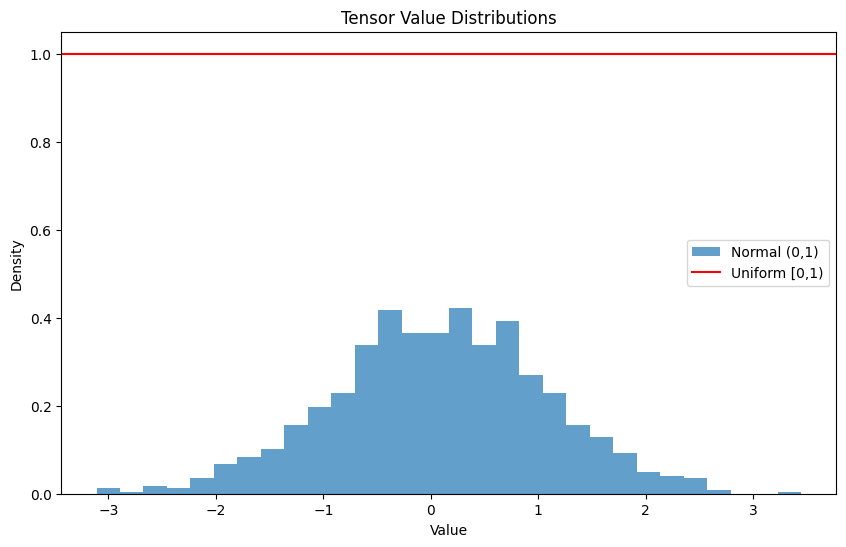

In [3]:
import torch
import matplotlib.pyplot as plt

# Generate sample data
normal_samples = torch.empty(1000).normal_(0, 1)
uniform_samples = torch.empty(1000).uniform_(0, 1)

# Plot
plt.figure(figsize=(10,6))
plt.hist(normal_samples.numpy(), bins=30, density=True, alpha=0.7, label='Normal (0,1)')
plt.axhline(1, color='red', linestyle='-', label='Uniform [0,1)')
plt.title('Tensor Value Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## Tensor Type Conversion

Creates a tensor with values [0, 1, 2, 3] and demonstrates type conversion to boolean, int16, int64, float16, float32, and float64.

In [ ]:
# Create a tensor and convert its type
tensor = torch.arange(4)
print("Boolean Tensor:", tensor.bool())   # Convert to boolean
print("Short Tensor (int16):", tensor.short())   # Convert to int16
print("Long Tensor (int64):", tensor.long())   # Convert to int64
print("Half Tensor (float16):", tensor.half())   # Convert to float16
print("Float Tensor (float32):", tensor.float())   # Convert to float32
print("Double Tensor (float64):", tensor.double())   # Convert to float64

Boolean Tensor: tensor([False,  True,  True,  True])
Short Tensor (int16): tensor([0, 1, 2, 3], dtype=torch.int16)
Long Tensor (int64): tensor([0, 1, 2, 3])
Half Tensor (float16): tensor([0., 1., 2., 3.], dtype=torch.float16)
Float Tensor (float32): tensor([0., 1., 2., 3.])
Double Tensor (float64): tensor([0., 1., 2., 3.], dtype=torch.float64)


## Converting Between NumPy Arrays and Tensors

PyTorch makes it easy to switch between NumPy arrays and tensors, allowing seamless integration with existing computing workflows.

In [ ]:
# Create a NumPy array of zeros
np_array = np.zeros((5, 5))
print("NumPy Array:\n", np_array)
# Convert NumPy array to PyTorch tensor
tensor = torch.from_numpy(np_array)
print("Tensor from NumPy Array:\n", tensor)``
# Convert tensor back to NumPy array
numpy_back = tensor.numpy()
print("Converted Back to NumPy Array:\n", numpy_back)

NumPy Array:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Tensor from NumPy Array:
 tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=torch.float64)
Converted Back to NumPy Array:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## Tensor Mathematics and Comparison Operations

This section explores essential math operations with PyTorch tensors.

- **Addition & Subtraction:** Adds and subtracts two tensors element-wise.  
- **Division:** Uses true division for precise results.  
- **Inplace Operations:** Modifies a tensor directly without creating a new one.  
- **Exponentiation:** Raises each element to a power using `pow()` or `**`.  
- **Comparisons:** Checks conditions like `x > 0` or `x < 0`, returning boolean results.  
- **Dot Product:** Computes the sum of element-wise multiplications between two tensors.

In [ ]:
# Define two tensors for operations
x = torch.tensor([1, 2, 3])
y = torch.tensor([9, 8, 7])

# Addition
z = x + y
print("Addition Results:", z)

# Addition using .add
z1 = torch.empty(3)
torch.add(x, y, out=z1)
z2 = torch.add(x, y)
print("Addition Results:", z, z1, z2)

# Subtraction
z = x - y
print("Subtraction Result:", z)

# Division (true division)
z = torch.true_divide(x, y)
print("Division Result:", z)

# Inplace operations
t = torch.ones(3)
print("Before inplace addition:", t)
t.add_(x)
print("After inplace addition:", t)
t += x  # Another inplace addition (note: t = t + x creates a new tensor)
print("After second inplace addition:", t)

# Exponentiation
z = x.pow(2)
print("Exponentiation (pow):", z)
z = x**2
print("Exponentiation (**):", z)

# Comparisons
z = x > 0
print("x > 0:", z)
z = x < 0
print("x < 0:", z)

# Dot product
z = torch.dot(x, y)
print("Dot Product:", z)

Addition Results: tensor([10, 10, 10])
Addition Results: tensor([10, 10, 10]) tensor([10., 10., 10.]) tensor([10, 10, 10])
Subtraction Result: tensor([-8, -6, -4])
Division Result: tensor([0.1111, 0.2500, 0.4286])
Before inplace addition: tensor([1., 1., 1.])
After inplace addition: tensor([2., 3., 4.])
After second inplace addition: tensor([3., 5., 7.])
Exponentiation (pow): tensor([1, 4, 9])
Exponentiation (**): tensor([1, 4, 9])
x > 0: tensor([True, True, True])
x < 0: tensor([False, False, False])
Dot Product: tensor(46)


## Matrix Multiplication and Batch Operations

Matrix operations are at the heart of deep learning. Let's find out different ways to perform multiplication.

- **Matrix Multiplication:** Uses `@` or `torch.mm()` to perform standard matrix multiplication.  
- **Matrix Exponentiation:** Raises a square matrix to a power using `matrix_power(n)`.  
- **Element-wise Multiplication:** Uses `torch.mul()` or `*` for element-wise multiplication.  
- **Batch Matrix Multiplication:** Uses `torch.bmm()` to multiply batches of matrices efficiently.

In [ ]:
# Matrix multiplication using @ operator and torch.mm
x2 = torch.tensor([[1, 2, 3]])
y2 = torch.tensor([[9, 8, 7]])

z = x2 @ torch.t(y2) # @: Clean syntax (Python 3.5+)
print("Matrix Multiplication (@ operator):\n", z)
z = torch.mm(x2, torch.t(y2)) # Explicit function call
print("Matrix Multiplication (torch.mm):\n", z)
z = x2.mm(torch.t(y2)) # Object-oriented style
print("Matrix Multiplication (mm):\n", z)

# Matrix exponentiation: multiplying a matrix with itself 3 times
matrix_exp = torch.rand(5, 5)
print("Matrix multiplied 3 times:\n", matrix_exp @ matrix_exp @ matrix_exp)
print("Matrix power 3:\n", matrix_exp.matrix_power(3))

# Element-wise multiplication
z = torch.mul(x, y)
print("Element-wise Multiplication:", z)
z = x * y
print("Element-wise Multiplication (alternative):", z)

# Batch matrix multiplication
#Efficiency: Processes all 32 matrices in parallel.
# Use Case: Transformer attention (batch processing of sequences).

batch = 32
n, m, p = 10, 20, 30
tensor1 = torch.rand((batch, n, m)) ## Shape: (32, 10, 20)
tensor2 = torch.rand((batch, m, p)) # # Shape: (32, 20, 30)
out_bmm = torch.bmm(tensor1, tensor2)  # Result shape: (batch, n, p) # Shape: (32, 10, 30)
print("Batch Matrix Multiplication (first batch):\n", out_bmm[0])
print("Shape of batched multiplication result:", (tensor1 @ tensor2).shape)

Matrix Multiplication (@ operator):
 tensor([[46]])
Matrix Multiplication (torch.mm):
 tensor([[46]])
Matrix Multiplication (mm):
 tensor([[46]])
Matrix multiplied 3 times:
 tensor([[3.2862, 3.4477, 2.8051, 4.4104, 3.6545],
        [3.6619, 3.9597, 3.2059, 4.9938, 3.9905],
        [5.2525, 5.7016, 4.5615, 7.2101, 5.7575],
        [5.7636, 5.9299, 4.9231, 7.6378, 6.3206],
        [4.1122, 4.5994, 3.6926, 5.7100, 4.5616]])
Matrix power 3:
 tensor([[3.2862, 3.4477, 2.8051, 4.4104, 3.6545],
        [3.6619, 3.9597, 3.2059, 4.9938, 3.9905],
        [5.2525, 5.7016, 4.5615, 7.2101, 5.7575],
        [5.7636, 5.9299, 4.9231, 7.6378, 6.3206],
        [4.1122, 4.5994, 3.6926, 5.7100, 4.5616]])
Element-wise Multiplication: tensor([ 9, 16, 21])
Element-wise Multiplication (alternative): tensor([ 9, 16, 21])
Batch Matrix Multiplication (first batch):
 tensor([[5.8679, 5.3618, 6.4725, 5.8707, 5.8277, 6.1958, 8.2317, 4.8718, 7.9212,
         8.0798, 8.5718, 7.5948, 6.2685, 6.8662, 7.0205, 6.5277, 6.4

## Broadcasting and Other Useful Operations

Broadcasting allows arithmetic operations on tensors of different shapes. This section also demonstrates additional useful functions.

- **Broadcasting:** Automatically expands smaller tensors to match larger ones in operations.  
- **Summation:** `torch.sum(x, dim=0)` computes sum along a specific dimension.  
- **Min/Max Values:** `torch.max()` and `torch.min()` return the highest and lowest values along a dimension.  
- **Absolute Values:** `torch.abs(x)` gets the element-wise absolute values.  
- **Argmax/Argmin:** `torch.argmax()` and `torch.argmin()` return the index of max/min values.  
- **Mean Calculation:** `torch.mean(x.float(), dim=0)` computes the mean (ensuring float dtype).  
- **Element-wise Comparison:** `torch.eq(x, y)` checks equality between two tensors.  
- **Sorting:** `torch.sort(y, dim=0)` sorts tensor elements and returns indices.  
- **Clamping:** `torch.clamp(x, min=0)` restricts values within a range.  
- **Boolean Operations:** `torch.any(x_bool)` checks if any value is `True`, `torch.all(x_bool)` checks if all are `True`.

In [ ]:
# Broadcasting example
x1 = torch.rand(5, 5)
x2 = torch.rand(5)
print("Tensor x1:\n", x1)
print("Tensor x2:\n", x2)
print("x1 - x2:\n", x1 - x2)
print("x1 raised to the power of x2:\n", x1 ** x2)

# Sum of tensor elements along dimension 0
sum_x = torch.sum(x, dim=0)
print("Sum along dimension 0:", sum_x)

# Maximum and minimum values
value, indices = torch.max(x, dim=0)
print("Max value and index:", value, indices)

value, indices = torch.min(x, dim=0)
print("Min value and index:", value, indices)

# Other operations
print("Absolute values:", torch.abs(x))
print("Argmax:", torch.argmax(x, dim=0))
print("Argmin:", torch.argmin(x, dim=0))
print("Mean (converted to float):", torch.mean(x.float(), dim=0))
print("Element-wise equality (x == y):", torch.eq(x, y))

# Sorting
sorted_y, indices = torch.sort(y, dim=0, descending=False)
print("Sorted y and indices:", sorted_y, indices)

# Clamping values
print("Clamped x:", torch.clamp(x, min=0))

# Boolean operations
x_bool = torch.tensor([1, 0, 1, 1, 1], dtype=torch.bool)
print("Any True:", torch.any(x_bool))
print("All True:", torch.all(x_bool))

Tensor x1:
 tensor([[0.9204, 0.2059, 0.6009, 0.4407, 0.3346],
        [0.3398, 0.8799, 0.3522, 0.2881, 0.7400],
        [0.9038, 0.4923, 0.6685, 0.4475, 0.7791],
        [0.0132, 0.8269, 0.9485, 0.0245, 0.9988],
        [0.9314, 0.2159, 0.3556, 0.9932, 0.2935]])
Tensor x2:
 tensor([0.2443, 0.8043, 0.5209, 0.9895, 0.1846])
x1 - x2:
 tensor([[ 0.6761, -0.5983,  0.0800, -0.5488,  0.1500],
        [ 0.0956,  0.0757, -0.1687, -0.7015,  0.5555],
        [ 0.6596, -0.3120,  0.1475, -0.5421,  0.5945],
        [-0.2311,  0.0226,  0.4276, -0.9650,  0.8142],
        [ 0.6871, -0.5884, -0.1654,  0.0037,  0.1089]])
x1 raised to the power of x2:
 tensor([[0.9799, 0.2806, 0.7670, 0.4445, 0.8170],
        [0.7682, 0.9022, 0.5807, 0.2919, 0.9459],
        [0.9756, 0.5655, 0.8107, 0.4513, 0.9550],
        [0.3475, 0.8582, 0.9728, 0.0255, 0.9998],
        [0.9828, 0.2914, 0.5835, 0.9933, 0.7975]])
Sum along dimension 0: tensor(6)
Max value and index: tensor(3) tensor(2)
Min value and index: tensor(1) ten

## Tensor Indexing

Access and modify tensor elements using indexing, slicing, and advanced indexing.

- **Accessing Rows & Columns:** Use `x[row, :]` for a row and `x[:, col]` for a column.  
- **Slicing:** `x[row, start:end]` extracts a portion of a row.  
- **Modifying Elements:** Directly assign values using `x[row, col] = value`.  
- **Fancy Indexing:** Use a list of indices to select multiple elements at once.  
- **Conditional Indexing:** Extract elements using conditions like `(x < 2) | (x > 8)`.  
- **Finding Even Numbers:** Use `x.remainder(2) == 0` to filter even values.  
- **Conditional Selection with `torch.where()`:** Chooses values based on a condition.  

In [ ]:
# Create a random tensor with shape (batch_size, features)
batch_size = 4
features = 10
x = torch.rand((batch_size, features))
# Access the first row
print("First row of tensor:", x[0, :])
# Access the second column
print("Second column of tensor:", x[:, 1])
# Access the first 10 elements of the third row
print("First 10 elements of third row:", x[2, 0:10])
# Modify a specific element (set first element to 100)
x[0, 0] = 100
# Fancy indexing example
x1 = torch.arange(10)
indices = [2, 5, 8]
print("Fancy indexing result:", x1[indices])
# Advanced indexing: select elements based on a condition
x2 = torch.arange(10)
print("Elements where x2 < 2 or x2 > 8:", x2[(x2 < 2) | (x2 > 8)])
print("Even numbers in x2:", x2[x2.remainder(2) == 0])
# Using torch.where to select values based on a condition
print("Using torch.where:", torch.where(x2 > 5, x2, x2 * 2))


First row of tensor: tensor([0.2002, 0.6748, 0.2045, 0.9202, 0.4004, 0.1569, 0.6739, 0.2559, 0.1785,
        0.1360])
Second column of tensor: tensor([0.6748, 0.9852, 0.8801, 0.8592])
First 10 elements of third row: tensor([0.9649, 0.8801, 0.0141, 0.5284, 0.1306, 0.2692, 0.4477, 0.2169, 0.4646,
        0.2486])
Fancy indexing result: tensor([2, 5, 8])
Elements where x2 < 2 or x2 > 8: tensor([0, 1, 9])
Even numbers in x2: tensor([0, 2, 4, 6, 8])
Using torch.where: tensor([ 0,  2,  4,  6,  8, 10,  6,  7,  8,  9])


## Tensor Reshaping

Learn how to reshape tensors, concatenate them, and change the order of dimensions.

- **Reshape with `view()` & `reshape()`:** Change tensor shape without altering data.  
- **Transpose & Flatten:** `.t()` transposes, `.contiguous().view(-1)` flattens.  
- **Concatenation:** `torch.cat([x1, x2], dim=0/1)` merges tensors along rows/columns.  
- **Flattening:** `.view(-1)` converts a tensor into a 1D array.  
- **Batch Reshaping:** `.view(batch, -1)` keeps batch size while reshaping.  
- **Permute Dimensions:** `.permute(0, 2, 1)` reorders dimensions efficiently.  
- **Unsqueeze for New Dimensions:** `.unsqueeze(dim)` adds singleton dimensions.  

In [ ]:
# Reshape a tensor using view and reshape
x = torch.arange(9)
x_3x3 = x.view(3, 3)
print("Reshaped to 3x3 using view:\n", x_3x3)
x_3x3 = x.reshape(3, 3)
print("Reshaped to 3x3 using reshape:\n", x_3x3)

# Transpose and flatten the tensor
y = x_3x3.t()
print("Flattened transposed tensor:", y.contiguous().view(9))

# Concatenation example
x1 = torch.rand(2, 5)
x2 = torch.rand(2, 5)
print("Concatenated along dimension 0 (rows):", torch.cat([x1, x2], dim=0).shape)
print("Concatenated along dimension 1 (columns):", torch.cat([x1, x2], dim=1).shape)

# Flatten the tensor using view(-1)
z = x1.view(-1)
print("Flattened tensor shape:", z.shape)

# Reshape with batch dimension
batch = 64
x = torch.rand(batch, 2, 5)
print("Reshaped to (batch, -1):", x.view(batch, -1).shape)

# Permute dimensions
z = x.permute(0, 2, 1)
print("Permuted tensor shape:", z.shape)

# Unsqueeze examples (adding new dimensions)
x = torch.arange(10)
print("Original x:", x)
print("x unsqueezed at dim 0:", x.unsqueeze(0).shape, x.unsqueeze(0))
print("x unsqueezed at dim 1:", x.unsqueeze(1).shape, x.unsqueeze(1))


Reshaped to 3x3 using view:
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
Reshaped to 3x3 using reshape:
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
Flattened transposed tensor: tensor([0, 3, 6, 1, 4, 7, 2, 5, 8])
Concatenated along dimension 0 (rows): torch.Size([4, 5])
Concatenated along dimension 1 (columns): torch.Size([2, 10])
Flattened tensor shape: torch.Size([10])
Reshaped to (batch, -1): torch.Size([64, 10])
Permuted tensor shape: torch.Size([64, 5, 2])
Original x: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x unsqueezed at dim 0: torch.Size([1, 10]) tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
x unsqueezed at dim 1: torch.Size([10, 1]) tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])


In [6]:
# ======================
#  Automatic Differentiation
# ======================
print("\n=== Autograd ===")
# Create tensor with gradient tracking
x = torch.tensor(2.0, requires_grad=True)
# Define a computation
y = x**3 + 2*x + 1
# Compute gradients
y.backward()
print(f"x = {x.item()}, y = {y.item()}")
print(f"dy/dx = {x.grad.item()}")  # Should be 3x² + 2 = 14 when x=2



=== 3. Autograd ===
x = 2.0, y = 13.0
dy/dx = 14.0


In [7]:
# ======================
#  Neural Network Example
# ======================
print("\n=== Simple Neural Network ===")

# Define a linear layer
linear_layer = torch.nn.Linear(in_features=3, out_features=1)

# Sample input (batch_size=2, features=3)
inputs = torch.tensor([[1.0, 2.0, 3.0],
                      [4.0, 5.0, 6.0]])

# Forward pass
outputs = linear_layer(inputs)

print(f"Input shape: {inputs.shape}")
print(f"Weights shape: {linear_layer.weight.shape}")
print(f"Output shape: {outputs.shape}")



=== Simple Neural Network ===
Input shape: torch.Size([2, 3])
Weights shape: torch.Size([1, 3])
Output shape: torch.Size([2, 1])


In [8]:
# ======================
# GPU Acceleration
# ======================
print("\n=== GPU Operations ===")

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Move tensors to GPU
x_gpu = torch.rand(2, 3).to(device)
y_gpu = torch.rand(3, 2).to(device)

# Operation happens on GPU
result_gpu = x_gpu @ y_gpu
print(f"GPU result shape: {result_gpu.shape}")


=== GPU Operations ===
Using device: cpu
GPU result shape: torch.Size([2, 2])


In [ ]:
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()  # Required for proper initialization
        self.fc1 = nn.Linear(10, 5)  # Layer 1: 10 inputs → 5 outputs
        self.fc2 = nn.Linear(5, 2)    # Layer 2: 5 inputs → 2 outputs

    def forward(self, x):
        t = self.fc1(x)
        x = torch.relu(t)  # Activation after first layer
        x = self.fc2(x)              # No activation for last layer
        return x

model = SimpleNet()
print(model)

#nn.Module automatically tracks all parameters:
for name, param in model.named_parameters():
    print(f"{name}: {param.shape}")

x = torch.randn(3, 10)  # Batch of 3 samples, 10 features each
output = model(x)       # Calls forward() automatically
print(output.shape)     # torch.Size([3, 2])

SimpleNet(
  (fc1): Linear(in_features=10, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=2, bias=True)
)
fc1.weight: torch.Size([5, 10])
fc1.bias: torch.Size([5])
fc2.weight: torch.Size([2, 5])
fc2.bias: torch.Size([2])
torch.Size([3, 2])


**Neural Network Model :  XOR Gate**
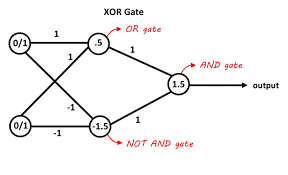

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# ======================
# 1. XOR Dataset
# ======================
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# ======================
# 2. Neural Network Model
# ======================
class XORNet(nn.Module):# nn.Module is the base class for all neural network modules in PyTorch
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # Input to hidden layer
        self.fc2 = nn.Linear(2, 1)   # Hidden to output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model = XORNet()

# ======================
# 3. Training Setup
# ======================
criterion = nn.BCELoss()  # Binary Cross Entropy
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)     

# ======================
# 4. Training Loop
# ======================
epochs = 10000
for epoch in range(epochs):
    # Forward pass
    outputs = model.forward(X)
    loss = criterion(outputs, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()  # gradient calculate hobrhe hai dl/dw
    optimizer.step()

    # Print progress
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# ======================
# 5. Evaluation
# ======================
with torch.no_grad():
    predictions = model(X)
    predicted_labels = (predictions > 0.5).float()
    accuracy = (predicted_labels == y).float().mean()

    print("\nFinal Predictions:")
    for i in range(len(X)):
        print(f"Input: {X[i].tolist()}, Predicted: {predictions[i].item():.4f}, Target: {y[i].item()}")

    print(f"\nAccuracy: {accuracy.item()*100:.2f}%")

Epoch [1000/10000], Loss: 0.0334
Epoch [2000/10000], Loss: 0.0075
Epoch [3000/10000], Loss: 0.0041
Epoch [4000/10000], Loss: 0.0029
Epoch [5000/10000], Loss: 0.0022
Epoch [6000/10000], Loss: 0.0018
Epoch [7000/10000], Loss: 0.0015
Epoch [8000/10000], Loss: 0.0013
Epoch [9000/10000], Loss: 0.0011
Epoch [10000/10000], Loss: 0.0010

Final Predictions:
Input: [0.0, 0.0], Predicted: 0.0010, Target: 0.0
Input: [0.0, 1.0], Predicted: 0.9987, Target: 1.0
Input: [1.0, 0.0], Predicted: 0.9991, Target: 1.0
Input: [1.0, 1.0], Predicted: 0.0008, Target: 0.0

Accuracy: 100.00%


In [ ]:
# Nested Modules
class ComplexNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Linear(10, 20),
            nn.ReLU()
        )
        self.block2 = SimpleNet()  # Reusing our previous model

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        return x

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm  # For progress bars

# 1. Define the CNN Architecture
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            # Conv Block 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            # Conv Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            # Conv Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# 2. Prepare Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

# 3. Initialize Model, Loss, and Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Training Loop
def train(model, loader, criterion, optimizer, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    pbar = tqdm(loader, desc=f'Epoch {epoch+1}')
    for inputs, labels in pbar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        pbar.set_postfix({'loss': running_loss/(total/len(loader)), 'acc': 100.*correct/total})

# 5. Testing Loop
def test(model, loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy

# 6. Run Training and Testing
for epoch in range(10):  # Train for 10 epochs
    train(model, train_loader, criterion, optimizer, epoch)
    test(model, test_loader)

# 7. Save the Model
torch.save(model.state_dict(), 'cifar10_cnn.pth')